In [118]:
import glob
import numpy as np
import cv2
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import shutil
import os
%matplotlib inline

In [119]:
path='kill_me_baby_datasets2'

In [127]:
labels=[i.split('\\')[-1] for i in glob.glob(path+'/train/*')]
for i in labels:
    label_list = glob.glob(os.path.join(path,'train',i,'*'))
    if len(label_list)<60:
        for name in label_list:
            lpath, lname = os.path.split(name)
            print(lpath,lname)
            shutil.copy2(name, lpath+'/copy_'+lname)

kill_me_baby_datasets2\train\botsu 03_058.png
kill_me_baby_datasets2\train\botsu 03_069.png
kill_me_baby_datasets2\train\botsu 07_034.png
kill_me_baby_datasets2\train\botsu 07_035.png
kill_me_baby_datasets2\train\botsu 07_036.png
kill_me_baby_datasets2\train\botsu 11_03.png
kill_me_baby_datasets2\train\botsu 11_036.png
kill_me_baby_datasets2\train\botsu 11_069.png
kill_me_baby_datasets2\train\botsu copy_03_058.png
kill_me_baby_datasets2\train\botsu copy_03_069.png
kill_me_baby_datasets2\train\botsu copy_07_034.png
kill_me_baby_datasets2\train\botsu copy_07_035.png
kill_me_baby_datasets2\train\botsu copy_07_036.png
kill_me_baby_datasets2\train\botsu copy_11_03.png
kill_me_baby_datasets2\train\botsu copy_11_036.png
kill_me_baby_datasets2\train\botsu copy_11_069.png
kill_me_baby_datasets2\train\botsu copy_copy_03_058.png
kill_me_baby_datasets2\train\botsu copy_copy_03_069.png
kill_me_baby_datasets2\train\botsu copy_copy_07_034.png
kill_me_baby_datasets2\train\botsu copy_copy_07_035.png
ki

In [128]:
def get_data2(dpath):
    path_list = glob.glob(dpath+'/*')
    #画像ファイル、ラベルを入れる箱を用意
    x=[]
    y=[]
    name=[]
    #フォルダ名でループを回す
    for label, pic_path in enumerate(path_list):
        #サブフォルダ内のファイルリストを取得
        train_pic_list = glob.glob(pic_path+'/*.png')
        print(pic_path, len(train_pic_list))
        #画像ファイルを取得＋リサイズ、ラベルを用意
        x += [cv2.resize(cv2.imread(i), (128, 128)) for i in train_pic_list]
        y += [label]*len(train_pic_list)
        name += train_pic_list

    #画像をfloat32に変換正規化、ラベルをカテゴリカル化
    x = np.float32(x)/255
    y = keras.utils.to_categorical(y, len(path_list))
    return x, y, name

In [129]:
x_train, y_train, train_name= get_data2(path+'/train')
print(x_train.shape, y_train.shape)

kill_me_baby_datasets2/train\agiri 72
kill_me_baby_datasets2/train\botsu 32
kill_me_baby_datasets2/train\hukusuu 88
kill_me_baby_datasets2/train\others 104
kill_me_baby_datasets2/train\sonya 141
kill_me_baby_datasets2/train\yasuna 273
(710, 128, 128, 3) (710, 6)


In [130]:
x_val, y_val, val_name = get_data2(path+'/val')
print(x_val.shape, y_val.shape)
x_test, y_test, test_name = get_data2(path+'/test')
print(x_test.shape, y_test.shape)

kill_me_baby_datasets2/val\agiri 4
kill_me_baby_datasets2/val\botsu 1
kill_me_baby_datasets2/val\hukusuu 4
kill_me_baby_datasets2/val\others 6
kill_me_baby_datasets2/val\sonya 17
kill_me_baby_datasets2/val\yasuna 34
(66, 128, 128, 3) (66, 6)
kill_me_baby_datasets2/test\agiri 4
kill_me_baby_datasets2/test\botsu 1
kill_me_baby_datasets2/test\hukusuu 4
kill_me_baby_datasets2/test\others 6
kill_me_baby_datasets2/test\sonya 17
kill_me_baby_datasets2/test\yasuna 34
(66, 128, 128, 3) (66, 6)


In [131]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()
        if p_1 > p:
            return input_img
        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)
        input_img[top:top + h, left:left + w, :] = c
        return input_img
    return eraser

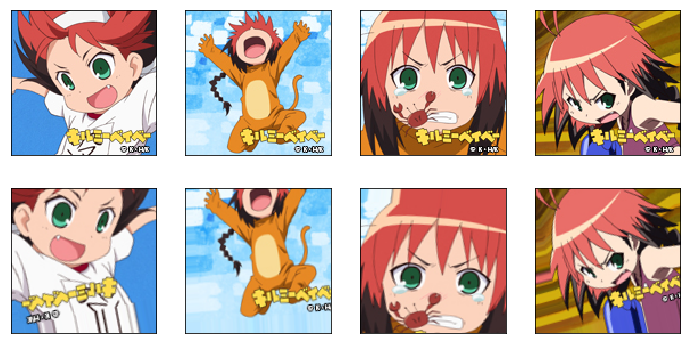

In [132]:
datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.2, height_shift_range=0.2,
                              rotation_range=20.0, zoom_range=0.2)
                            #preprocessing_function=get_random_eraser(s_l=0.01, s_h=0.1, pixel_level=True))
# 9個の画像を生成します
g = datagen.flow(x_train[100:], shuffle=False)
idg_x_train=next(g)

plt.figure(figsize=(12, 6)) 
for i in range(4):
    plt.subplot(2,4,i+1),plt.imshow(cv2.cvtColor(x_train[i+100], cv2.COLOR_BGR2RGB)),plt.xticks([]),plt.yticks([])
    plt.subplot(2,4,i+5),plt.imshow(cv2.cvtColor(idg_x_train[i], cv2.COLOR_BGR2RGB)),plt.xticks([]),plt.yticks([])
plt.savefig('idg_agiri.png')
plt.show()

In [133]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten, Input, Dropout
from keras.models import Model
from keras.optimizers import Adam

In [138]:
def tuning_vgg16():
    input_shape = (128, 128, 3)
    input_tensor = Input(shape=input_shape)
    vgg16_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)
    x = vgg16_model.output
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(6, activation='softmax', init='uniform')(x)
    model = Model(input=vgg16_model.input, output=x)
    return model

In [139]:
model=tuning_vgg16()
#for layer in model.layers[:15]:layer.trainable=False
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

C:\Users\we_lo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="softmax", kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\we_lo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


In [140]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
#val_lossがbestの値を出したときにモデルの重みのみ(weight_only)を保存
checkpoint_path = path+"/weights/weights_{epoch:02d}_{val_loss:.3f}_{val_acc:.3f}.h5"
print(checkpoint_path)
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_acc', verbose=0,
                                 save_best_only=True, save_weights_only=True, mode='auto')  

#accの向上がない=学習が止まっているとみてストップする。
earlystop = EarlyStopping(monitor='acc', patience=15, verbose=1, mode='auto')
    
# CSV出力、下に重ねていく
csv_logger = CSVLogger(path+'/weights/training.csv', append=True)
    
# val_lossの向上が見られない時に学習率を減らす。
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.1**0.5, cooldown=0, patience=10,
                                   verbose=1, min_lr=0.5e-4)
call_backs = [csv_logger,checkpoint, lr_reducer]
print('use:csv_logger,checkpoint2,lr_reducer')

kill_me_baby_datasets2/weights/weights_{epoch:02d}_{val_loss:.3f}_{val_acc:.3f}.h5
use:csv_logger,checkpoint2,lr_reducer


In [141]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=100, verbose=1, callbacks=call_backs,
                    validation_data=(x_val, y_val))

Epoch 1/100
23/22 [===============================] - 6s 276ms/step - loss: 1.7606 - acc: 0.3340 - val_loss: 1.4664 - val_acc: 0.5152
Epoch 2/100
23/22 [===============================] - 3s 125ms/step - loss: 1.6218 - acc: 0.3884 - val_loss: 1.3829 - val_acc: 0.5152
Epoch 3/100
23/22 [===============================] - 3s 126ms/step - loss: 1.6017 - acc: 0.3882 - val_loss: 1.2978 - val_acc: 0.5303
Epoch 4/100
23/22 [===============================] - 3s 126ms/step - loss: 1.4364 - acc: 0.4850 - val_loss: 0.9770 - val_acc: 0.7424
Epoch 5/100
23/22 [===============================] - 3s 125ms/step - loss: 1.3105 - acc: 0.5327 - val_loss: 0.9818 - val_acc: 0.7121
Epoch 6/100
23/22 [===============================] - 3s 125ms/step - loss: 1.2914 - acc: 0.5381 - val_loss: 0.8403 - val_acc: 0.7576
Epoch 7/100
23/22 [===============================] - 3s 126ms/step - loss: 1.1751 - acc: 0.5762 - val_loss: 0.8831 - val_acc: 0.7121
Epoch 8/100
23/22 [===============================] - 3s 126ms

Epoch 62/100
23/22 [===============================] - 3s 128ms/step - loss: 0.3408 - acc: 0.8894 - val_loss: 0.1100 - val_acc: 0.9394
Epoch 63/100
23/22 [===============================] - 3s 128ms/step - loss: 0.2687 - acc: 0.9073 - val_loss: 0.0924 - val_acc: 0.9545
Epoch 64/100
23/22 [===============================] - 3s 128ms/step - loss: 0.3495 - acc: 0.8909 - val_loss: 0.2171 - val_acc: 0.9091
Epoch 65/100
23/22 [===============================] - 3s 128ms/step - loss: 0.4280 - acc: 0.8556 - val_loss: 0.1607 - val_acc: 0.9545
Epoch 66/100
23/22 [===============================] - 3s 128ms/step - loss: 0.3154 - acc: 0.8950 - val_loss: 0.1369 - val_acc: 0.9545
Epoch 67/100
23/22 [===============================] - 3s 128ms/step - loss: 0.2989 - acc: 0.9112 - val_loss: 0.3153 - val_acc: 0.9091
Epoch 68/100
23/22 [===============================] - 3s 128ms/step - loss: 0.3420 - acc: 0.8952 - val_loss: 0.1687 - val_acc: 0.8939
Epoch 69/100
23/22 [===============================] - 

In [142]:
weight_list=glob.glob(path+'/weights/*.h5')
print(weight_list[-1])
model.load_weights(weight_list[-1])

kill_me_baby_datasets2/weights\weights_75_0.077_0.985.h5


In [143]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19684040258553895
Test accuracy: 0.9242424242424242


In [144]:
predictions = model.predict(x_test)
print('predictions,shape', predictions.shape)
predict_classes = np.argmax(predictions, 1)
true_classes = np.argmax(y_test, 1)
print(confusion_matrix(true_classes, predict_classes))

predictions,shape (66, 6)
[[ 4  0  0  0  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  4  2  0]
 [ 0  0  0  0 17  0]
 [ 0  0  2  0  0 32]]


In [145]:

labels=[i.split('\\')[-1] for i in glob.glob(path+'/train/*')]
for i in range(66):
    if predict_classes[i]!=true_classes[i]:
        name_split=test_name[i].split('\\')
        shutil.copy2(test_name[i], path+'/miss/'+'{}_to_{}_'.format(labels[true_classes[i]], labels[predict_classes[i]])+name_split[-1])